# Oxygen Level Regression

Thank you data from https://www.kaggle.com/tjkyner/global-seawater-oxygen18-levels

In [148]:
import sys
sys.version_info

sys.version_info(major=3, minor=12, micro=7, releaselevel='final', serial=0)

In [149]:
pip list

Package                 Version
----------------------- -----------
appnope                 0.1.4
asttokens               3.0.0
certifi                 2025.4.26
comm                    0.2.2
contourpy               1.3.2
cycler                  0.12.1
debugpy                 1.8.14
decorator               5.2.1
executing               2.2.0
fonttools               4.58.4
ipykernel               6.29.5
ipython                 9.3.0
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
joblib                  1.5.1
jupyter_client          8.6.3
jupyter_core            5.8.1
kiwisolver              1.4.8
lightgbm                4.6.0
matplotlib              3.10.3
matplotlib-inline       0.1.7
nest-asyncio            1.6.0
numpy                   2.3.1
packaging               25.0
pandas                  2.3.0
parso                   0.8.4
pexpect                 4.9.0
pillow                  11.3.0
pip                     24.2
platformdirs            4.3.8
prompt_toolkit         

In [150]:
import sklearn
sklearn.__version__ 

'1.7.0'

In [151]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [152]:
df = pd.read_csv('gso18.csv', usecols = [i for i in range(10)])
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,Longitude,Latitude,Depth,pTemperature,Salinity,d18O,dD,Year,Month,Reference
0,31.40,81.27,3,-1.66,34.09,0.25,**,1987,7,Bauch et al (1995)
1,31.40,81.27,9,-1.66,34.11,0.11,**,1987,7,Bauch et al (1995)
2,31.40,81.27,20,-1.64,34.15,0.24,**,1987,7,Bauch et al (1995)
3,31.40,81.27,40,-1.14,34.45,0.14,**,1987,7,Bauch et al (1995)
4,31.40,81.27,59,-0.45,34.68,0.27,**,1987,7,Bauch et al (1995)
...,...,...,...,...,...,...,...,...,...,...
25509,40.13,-52.50,2009,0.89,34.72,-0.09,**,1993,4,SWINDEX (K.J. Heywood pers. communication)
25510,40.13,-52.50,2260,0.6,34.7,-0.14,**,1993,4,SWINDEX (K.J. Heywood pers. communication)
25511,40.13,-52.50,2508,0.38,34.69,-0.12,**,1993,4,SWINDEX (K.J. Heywood pers. communication)
25512,40.13,-52.50,2757,0.06,34.68,-0.22,**,1993,4,SWINDEX (K.J. Heywood pers. communication)


In [153]:
print(df.columns)
df.index

Index(['Longitude', 'Latitude', 'Depth', 'pTemperature', 'Salinity', 'd18O',
       'dD', 'Year', 'Month', 'Reference'],
      dtype='object')


RangeIndex(start=0, stop=25514, step=1)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25514 entries, 0 to 25513
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Longitude     25514 non-null  float64
 1   Latitude      25514 non-null  float64
 2   Depth         25514 non-null  int64  
 3   pTemperature  25514 non-null  object 
 4   Salinity      25514 non-null  object 
 5   d18O          25514 non-null  object 
 6   dD            25514 non-null  object 
 7   Year          25514 non-null  object 
 8   Month         25514 non-null  object 
 9   Reference     25514 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.9+ MB


In [155]:
df2 = df.drop(['dD', 'Reference','Year', 'Month', 'Longitude', 'Latitude'], axis=1)
df2

,Depth,pTemperature,Salinity,d18O
0,3,-1.66,34.09,0.25
1,9,-1.66,34.11,0.11
2,20,-1.64,34.15,0.24
3,40,-1.14,34.45,0.14
4,59,-0.45,34.68,0.27
...,...,...,...,...
25509,2009,0.89,34.72,-0.09
25510,2260,0.6,34.7,-0.14
25511,2508,0.38,34.69,-0.12
25512,2757,0.06,34.68,-0.22


In [156]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25514 entries, 0 to 25513
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Depth         25514 non-null  int64 
 1   pTemperature  25514 non-null  object
 2   Salinity      25514 non-null  object
 3   d18O          25514 non-null  object
dtypes: int64(1), object(3)
memory usage: 797.4+ KB


In [157]:
type(df2['d18O'])
display(df2['d18O'])

0         0.25
1         0.11
2         0.24
3         0.14
4         0.27
         ...  
25509    -0.09
25510    -0.14
25511    -0.12
25512    -0.22
25513    -0.22
Name: d18O, Length: 25514, dtype: object

In [158]:
print(type(df2=='**'))
display(df2!='**')

<class 'pandas.core.frame.DataFrame'>


,Depth,pTemperature,Salinity,d18O
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
...,...,...,...,...
25509,True,True,True,True
25510,True,True,True,True
25511,True,True,True,True
25512,True,True,True,True


In [159]:
df3 = df2[df2!='**'].dropna()
df4 = df3.reset_index(drop=True, inplace=False)
df4

,Depth,pTemperature,Salinity,d18O
0,3,-1.66,34.09,0.25
1,9,-1.66,34.11,0.11
2,20,-1.64,34.15,0.24
3,40,-1.14,34.45,0.14
4,59,-0.45,34.68,0.27
...,...,...,...,...
19997,2009,0.89,34.72,-0.09
19998,2260,0.6,34.7,-0.14
19999,2508,0.38,34.69,-0.12
20000,2757,0.06,34.68,-0.22


In [160]:
convert_dict = {'Depth': float, 'pTemperature': float, 'Salinity': float, 'd18O': float}  
df5 = df4.astype(convert_dict)
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20002 entries, 0 to 20001
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Depth         20002 non-null  float64
 1   pTemperature  20002 non-null  float64
 2   Salinity      20002 non-null  float64
 3   d18O          20002 non-null  float64
dtypes: float64(4)
memory usage: 625.2 KB


# EDA (Exploratory Data Analysis)

In [161]:
df5.head(8)

,Depth,pTemperature,Salinity,d18O
0,3.0,-1.66,34.09,0.25
1,9.0,-1.66,34.11,0.11
2,20.0,-1.64,34.15,0.24
3,40.0,-1.14,34.45,0.14
4,59.0,-0.45,34.68,0.27
5,79.0,-0.13,34.74,0.24
6,98.0,-0.18,34.74,0.19
7,124.0,-0.20,34.75,0.27


In [162]:
df5.describe()

,Depth,pTemperature,Salinity,d18O
count,20002.000000,20002.000000,20002.000000,20002.000000
mean,642.306369,2.645352,33.619316,-0.497843
std,1021.755447,5.939797,3.530860,1.646113
min,0.000000,-2.120000,0.000000,-17.380000
25%,31.000000,-0.800000,33.310000,-0.660000
50%,156.000000,0.660000,34.610000,-0.100000
75%,750.000000,3.130000,34.880000,0.240000
max,9742.000000,38.770000,39.560000,3.070000


In [163]:
correlation_map = df5.corr()

<Axes: >

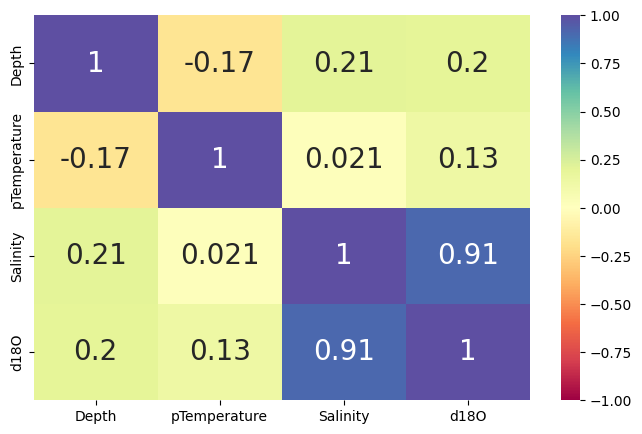

In [164]:
plt.figure(figsize=(8,5))
sns.heatmap(correlation_map, annot=True, vmin=-1, vmax=1, annot_kws={"size": 20}, cmap="Spectral")

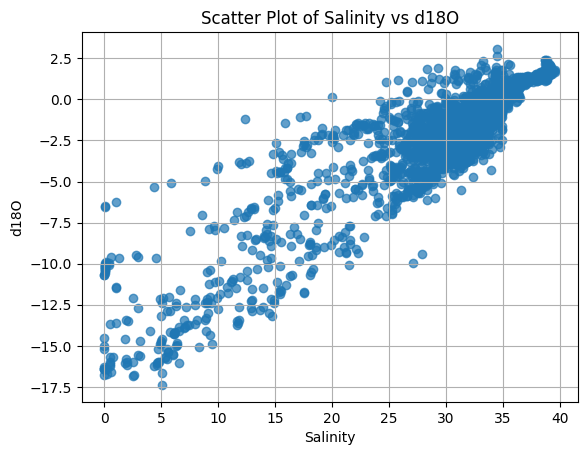

In [165]:
plt.scatter(df5['Salinity'], df5['d18O'], alpha=0.7)
plt.xlabel('Salinity')
plt.ylabel('d18O')
plt.title('Scatter Plot of Salinity vs d18O')
plt.grid(True)
plt.show()

In [166]:
df5[['Salinity','d18O']].corr()

,Salinity,d18O
Salinity,1.000000,0.910629
d18O,0.910629,1.000000


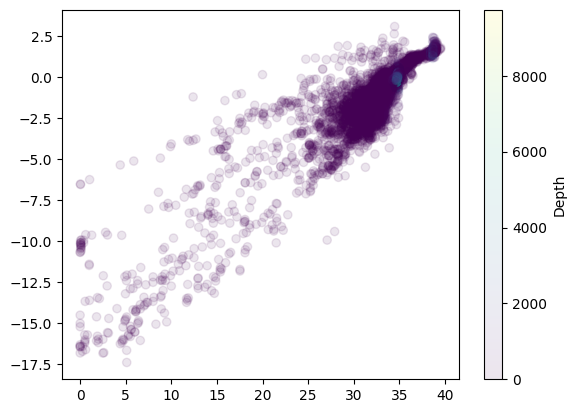

In [167]:
plt.scatter(df5['Salinity'], df5['d18O'], 
            c=df5['Depth'], cmap='viridis', alpha=0.1)
plt.colorbar(label='Depth')

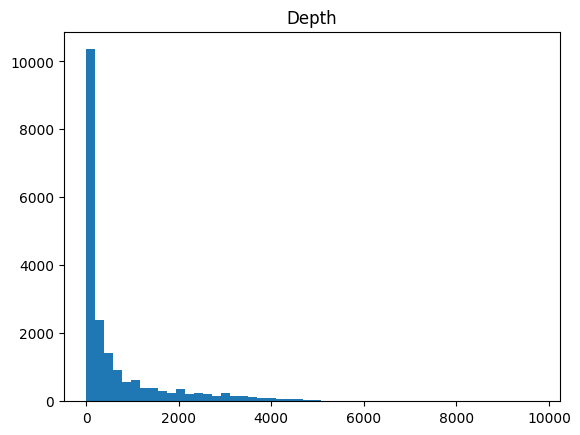

In [168]:
plt.hist(df5['Depth'], bins=50)
plt.title('Depth')
plt.show()

(array([7.890e+02, 0.000e+00, 0.000e+00, 2.820e+02, 0.000e+00, 3.140e+02,
        0.000e+00, 2.060e+02, 1.180e+02, 2.430e+02, 1.440e+02, 2.400e+02,
        1.750e+02, 6.940e+02, 1.630e+02, 1.990e+02, 4.380e+02, 5.130e+02,
        4.840e+02, 3.140e+02, 4.080e+02, 1.026e+03, 3.170e+02, 7.360e+02,
        2.820e+02, 9.270e+02, 3.990e+02, 7.360e+02, 8.050e+02, 3.680e+02,
        6.170e+02, 7.010e+02, 6.340e+02, 7.370e+02, 4.870e+02, 4.610e+02,
        5.600e+02, 6.480e+02, 4.180e+02, 4.900e+02, 4.690e+02, 5.150e+02,
        5.490e+02, 5.400e+02, 4.270e+02, 2.990e+02, 1.250e+02, 3.000e+00,
        1.000e+00, 1.000e+00]),
 array([0.        , 0.07977385, 0.15954771, 0.23932156, 0.31909542,
        0.39886927, 0.47864312, 0.55841698, 0.63819083, 0.71796469,
        0.79773854, 0.87751239, 0.95728625, 1.0370601 , 1.11683396,
        1.19660781, 1.27638166, 1.35615552, 1.43592937, 1.51570323,
        1.59547708, 1.67525094, 1.75502479, 1.83479864, 1.9145725 ,
        1.99434635, 2.07412021, 2.15

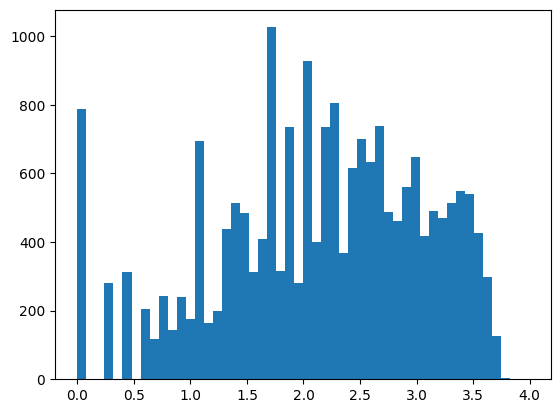

In [169]:
plt.hist(np.log10(df5['Depth']+1), bins=50)

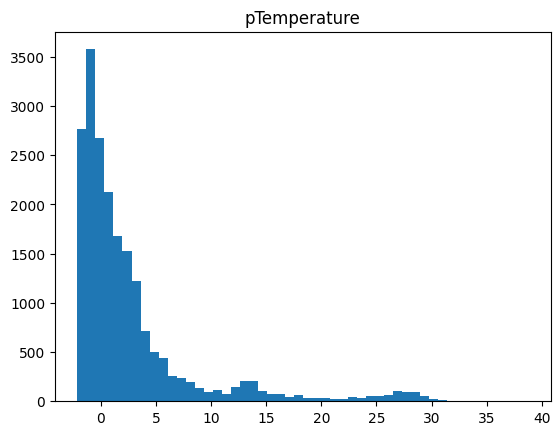

In [170]:
plt.hist(df5['pTemperature'], bins=50)
plt.title('pTemperature')
plt.show()

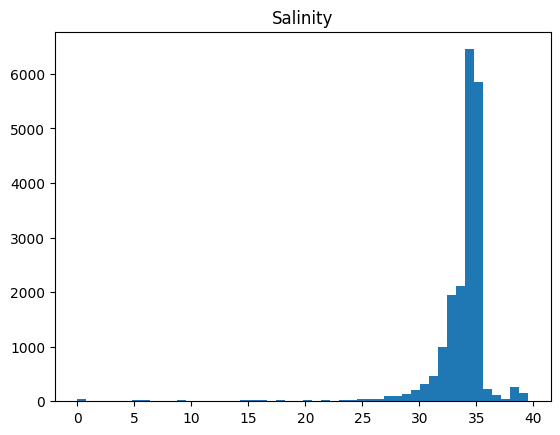

In [171]:
plt.hist(df5['Salinity'], bins=50)
plt.title('Salinity')
plt.show()

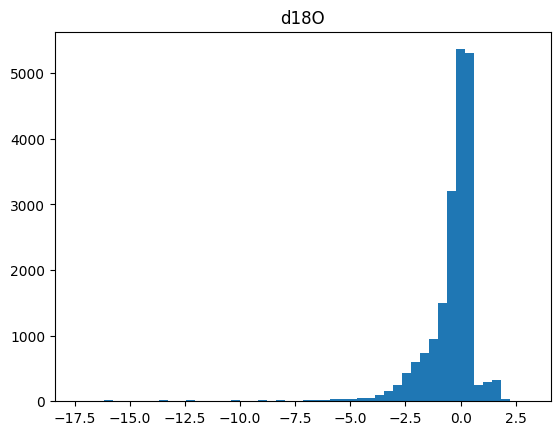

In [172]:
plt.hist(df5['d18O'], bins=50)
plt.title('d18O')
plt.show()

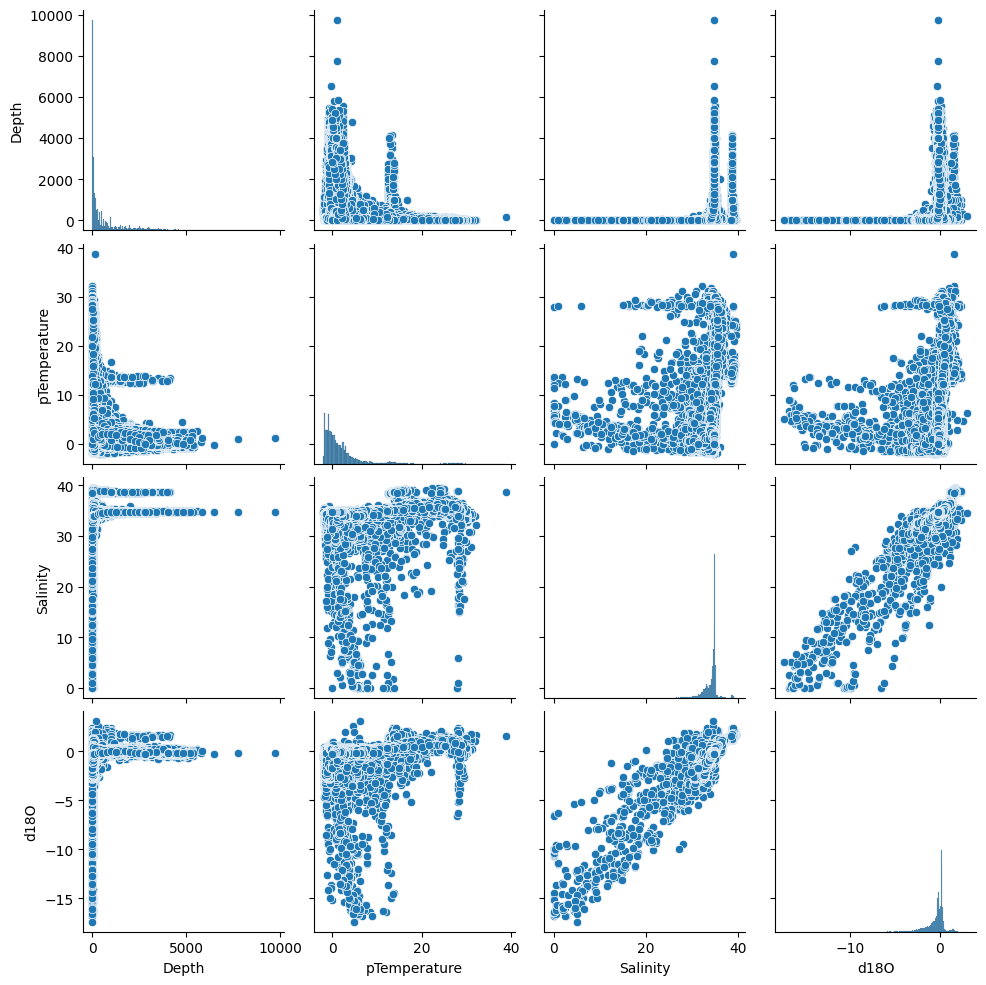

In [173]:
sns.pairplot(df5)

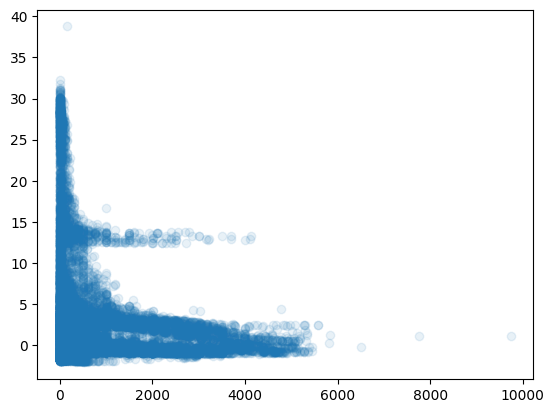

In [174]:
plt.scatter(df5['Depth'], df5['pTemperature'], alpha=0.1)

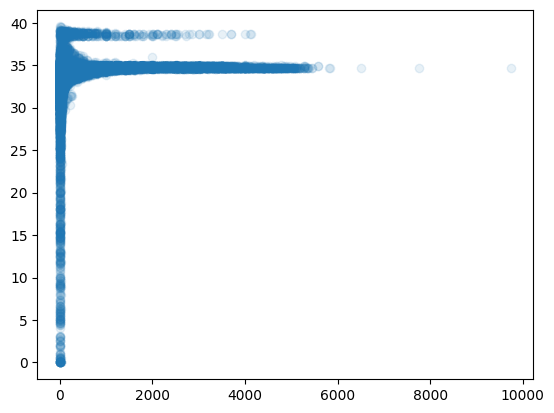

In [175]:
plt.scatter(df5['Depth'], df5['Salinity'], alpha=0.1)

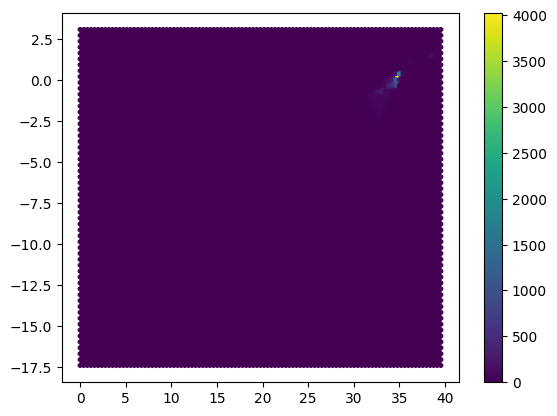

In [176]:
plt.hexbin(df5['Salinity'], df5['d18O'], gridsize=100)
plt.colorbar()

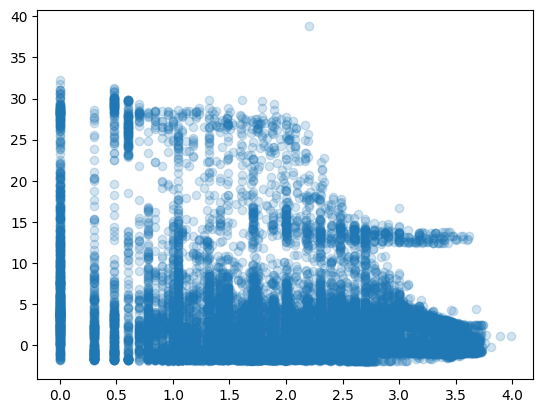

In [177]:
plt.scatter(np.log10(df5['Depth']+1), df5['pTemperature'], alpha=0.2)

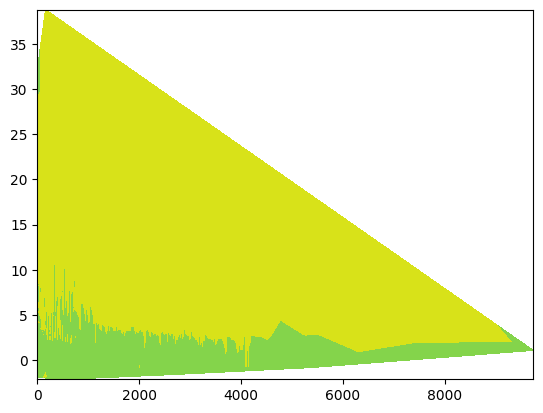

In [178]:
plt.tricontourf(df5['Depth'], df5['pTemperature'], df5['Salinity'])

# Preprocessing

In [179]:
X = df5.drop('d18O', axis=1)
y = df5['d18O']

In [180]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024
                                                    )

In [181]:
X_train.shape, X_test.shape

((14001, 3), (6001, 3))

In [182]:
X_train.head(8)

,Depth,pTemperature,Salinity
16880,55.0,-1.67,32.98
15313,50.0,-0.63,33.66
12738,296.0,1.73,34.88
17991,16.0,9.61,33.72
14106,543.0,-1.52,34.51
10509,65.0,-0.51,33.89
11996,2408.0,-0.80,34.92
6643,3811.0,-0.48,34.65


# Model

In [183]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

### Model: Linear Regression

In [184]:
from sklearn.linear_model import LinearRegression

pipe_Linereg = Pipeline([('scaler', StandardScaler()), ('Linereg', LinearRegression())])

pipe_Linereg.fit(X_train, y_train)

print("Coeficient:", pipe_Linereg.named_steps['Linereg'].coef_, "Intercept:", pipe_Linereg.named_steps['Linereg'].intercept_)

Coeficient: [0.04817597 0.19467064 1.48174796] Intercept: -0.4982594100421434


In [185]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

def score(ytest, predict):
    r2 = r2_score(ytest, predict)
    MAE = mean_absolute_error(ytest, predict)
    MSE = mean_squared_error(ytest, predict)
    RMSE = root_mean_squared_error(ytest, predict)
    print(f"R2 = {r2} \nMAE = {MAE} \nMSE = {MSE} \nRMSE = {RMSE}")


In [186]:
y_predict = pipe_Linereg.predict(X_test)
score(y_test, y_predict)

R2 = 0.836405018337627 
MAE = 0.3771294880441721 
MSE = 0.4524520479890376 
RMSE = 0.6726455589603172


Text(0.5, 1.0, 'd180')

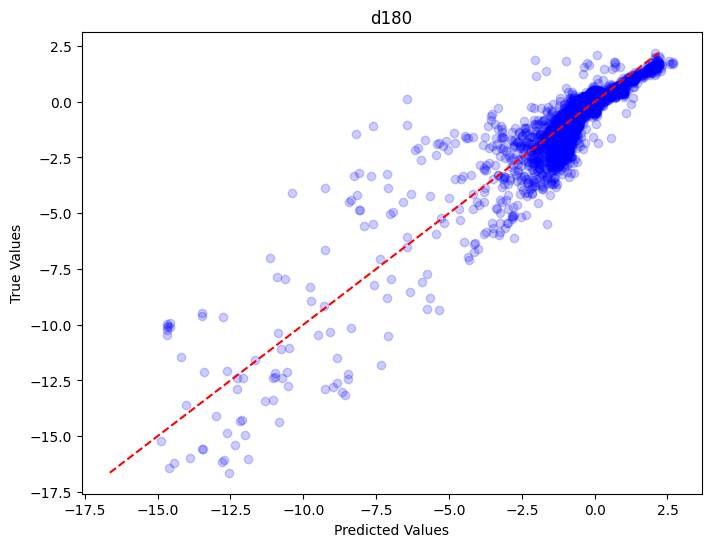

In [187]:
plt.figure(figsize=(8, 6))
plt.scatter(y_predict, y_test, color='blue', alpha=0.2)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('d180')

In [188]:
def plot_feature_importance(feature_importance, column_name):
    sorted_idx = feature_importance.argsort()
    plt.barh(column_name[sorted_idx], feature_importance[sorted_idx])
    plt.xlabel("Feature Importance")

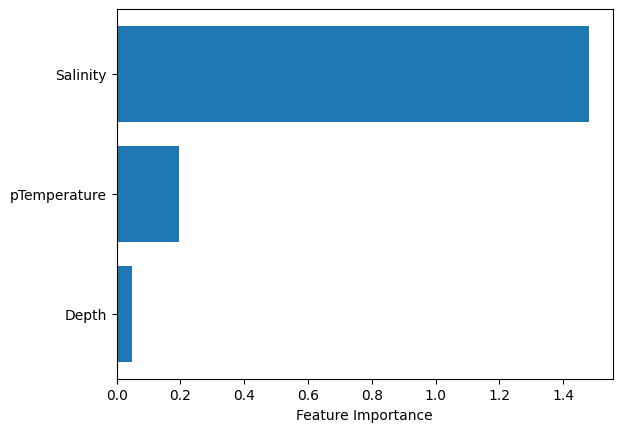

In [189]:
feature_importance = pipe_Linereg.named_steps['Linereg'].coef_
features = np.array(X.columns)

plot_feature_importance(feature_importance, features)

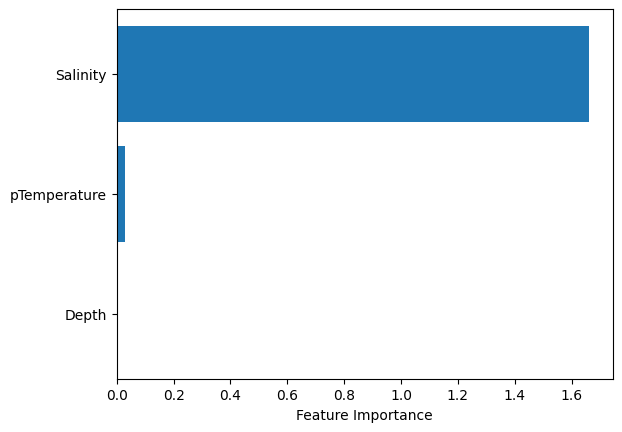

In [190]:
from sklearn.inspection import permutation_importance

feature_importance = permutation_importance(pipe_Linereg, X_test, y_test, n_repeats=10)
features = np.array(X.columns)

plot_feature_importance(feature_importance.importances_mean, features)

In [191]:
feature_importance

{'importances_mean': array([0.00172918, 0.02897957, 1.66160142]),
 'importances_std': array([0.00032605, 0.00132692, 0.02313911]),
 'importances': array([[1.41278900e-03, 1.68644582e-03, 2.22594220e-03, 1.58728232e-03,
         1.21085042e-03, 1.64180924e-03, 2.13160941e-03, 2.11577713e-03,
         1.42693608e-03, 1.85233150e-03],
        [3.00981346e-02, 2.80367051e-02, 2.74166461e-02, 2.95499883e-02,
         3.12797526e-02, 2.93554096e-02, 2.73661440e-02, 2.97488731e-02,
         2.98056072e-02, 2.71384877e-02],
        [1.63157636e+00, 1.66973509e+00, 1.69812676e+00, 1.65132119e+00,
         1.68841755e+00, 1.64814093e+00, 1.65446924e+00, 1.66962229e+00,
         1.62265190e+00, 1.68195291e+00]])}

### Model: Polynomial regression

In [192]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

pipe_Polyreg = Pipeline([('polyFeature', PolynomialFeatures(degree=3)), ('scaler', StandardScaler()), ('Linereg', LinearRegression())])

pipe_Polyreg.fit(X_train, y_train)

,steps,"[('polyFeature', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


In [193]:
display(pipe_Polyreg.named_steps)
display(pipe_Polyreg.named_steps['polyFeature'])

{'polyFeature': PolynomialFeatures(degree=3),
 'scaler': StandardScaler(),
 'Linereg': LinearRegression()}

,degree,3
,interaction_only,False
,include_bias,True
,order,'C'


In [194]:
X_train.shape, X_train.head()

((14001, 3),
        Depth  pTemperature  Salinity
 16880   55.0         -1.67     32.98
 15313   50.0         -0.63     33.66
 12738  296.0          1.73     34.88
 17991   16.0          9.61     33.72
 14106  543.0         -1.52     34.51)

In [195]:
X_poly = pipe_Polyreg.named_steps['polyFeature'].transform(X_train)
display('polyFeature', X_poly.shape, X_poly, X_poly[0]) 
X_scaled = pipe_Polyreg.named_steps['scaler'].transform(X_poly)
display('scaler', X_scaled.shape, X_scaled, X_scaled[0])

y_sol = pipe_Polyreg.named_steps['Linereg'].predict(X_scaled)
display('Linereg', y_sol.shape, y_sol)

'polyFeature'

(14001, 20)

array([[ 1.00000000e+00,  5.50000000e+01, -1.67000000e+00, ...,
         9.19779220e+01, -1.81642627e+03,  3.58716996e+04],
       [ 1.00000000e+00,  5.00000000e+01, -6.30000000e-01, ...,
         1.33596540e+01, -7.13787228e+02,  3.81366319e+04],
       [ 1.00000000e+00,  2.96000000e+02,  1.73000000e+00, ...,
         1.04392352e+02,  2.10474291e+03,  4.24355103e+04],
       ...,
       [ 1.00000000e+00,  1.76000000e+02,  2.38000000e+00, ...,
         1.97857492e+02,  2.90384966e+03,  4.26182642e+04],
       [ 1.00000000e+00,  5.99000000e+02,  3.65000000e+00, ...,
         4.56828525e+02,  4.29168496e+03,  4.03183226e+04],
       [ 1.00000000e+00,  5.10000000e+01,  2.21000000e+00, ...,
         1.59270501e+02,  2.35014074e+03,  3.46778686e+04]],
      shape=(14001, 20))

array([ 1.00000000e+00,  5.50000000e+01, -1.67000000e+00,  3.29800000e+01,
        3.02500000e+03, -9.18500000e+01,  1.81390000e+03,  2.78890000e+00,
       -5.50766000e+01,  1.08768040e+03,  1.66375000e+05, -5.05175000e+03,
        9.97645000e+04,  1.53389500e+02, -3.02921300e+03,  5.98224220e+04,
       -4.65746300e+00,  9.19779220e+01, -1.81642627e+03,  3.58716996e+04])

'scaler'

(14001, 20)

array([[ 0.        , -0.57431516, -0.72994821, ..., -0.28689903,
        -0.68316109, -0.42534826],
       [ 0.        , -0.57921187, -0.55354532, ..., -0.30392319,
        -0.52924648, -0.11730323],
       [ 0.        , -0.33829353, -0.15324645, ..., -0.28421078,
        -0.13581497,  0.46737125],
       ...,
       [ 0.        , -0.45581467, -0.04299465, ..., -0.26397164,
        -0.02426968,  0.49222693],
       [ 0.        , -0.04155265,  0.17242042, ..., -0.20789351,
         0.16945475,  0.17942042],
       [ 0.        , -0.57823253, -0.07182974, ..., -0.27232735,
        -0.10156051, -0.58771678]], shape=(14001, 20))

array([ 0.        , -0.57431516, -0.72994821, -0.18387814, -0.37284134,
       -0.29253657, -0.5766704 , -0.28820451, -0.70844152, -0.32122837,
       -0.25591555, -0.13768593, -0.37349906, -0.20052404, -0.28016479,
       -0.57885909, -0.23511895, -0.28689903, -0.68316109, -0.42534826])

'Linereg'

(14001,)

array([-1.14274392, -0.65185303,  0.1930233 , ...,  0.2467314 ,
       -0.1780821 , -1.02580608], shape=(14001,))

In [196]:
y_predict = pipe_Polyreg.predict(X_test)
score(y_test, y_predict)

R2 = 0.8648773396637378 
MAE = 0.30293724497018515 
MSE = 0.37370660015135654 
RMSE = 0.6113154669655894


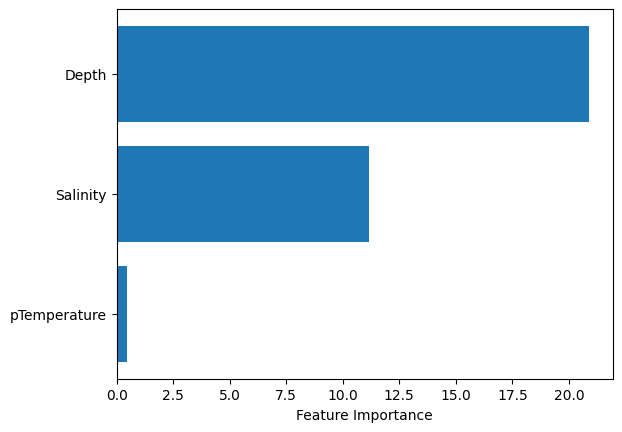

In [197]:
from sklearn.inspection import permutation_importance

feature_importance = permutation_importance(pipe_Polyreg, X_test, y_test, n_repeats=10)
features = np.array(X.columns)

plot_feature_importance(feature_importance.importances_mean, features)

In [198]:
poly_feature = pipe_Polyreg.named_steps['polyFeature']

input_feature_names = X.columns
feature_names = poly_feature.get_feature_names_out(input_features=input_feature_names)

linear_coefficients = pipe_Polyreg.named_steps['Linereg'].coef_

for feature, coef in zip(feature_names, linear_coefficients):
    print(f"Feature: {feature}, Coefficient: {coef}")

Feature: 1, Coefficient: 0.0
Feature: Depth, Coefficient: 61.882062957884344
Feature: pTemperature, Coefficient: 0.6414393145899898
Feature: Salinity, Coefficient: 1.706592631684408
Feature: Depth^2, Coefficient: 4.400979145373625
Feature: Depth pTemperature, Coefficient: 6.4334954390719865
Feature: Depth Salinity, Coefficient: -144.2318019607152
Feature: pTemperature^2, Coefficient: 0.266594442659118
Feature: pTemperature Salinity, Coefficient: 1.2883408794494111
Feature: Salinity^2, Coefficient: -0.839063804713102
Feature: Depth^3, Coefficient: 0.025817353943596588
Feature: Depth^2 pTemperature, Coefficient: 0.07846972314240248
Feature: Depth^2 Salinity, Coefficient: -4.4667391973049435
Feature: Depth pTemperature^2, Coefficient: 0.16566879054279043
Feature: Depth pTemperature Salinity, Coefficient: -7.034242603153647
Feature: Depth Salinity^2, Coefficient: 82.45105047981409
Feature: pTemperature^3, Coefficient: 0.5080807598278223
Feature: pTemperature^2 Salinity, Coefficient: -0.996

### Learning Curve

In [199]:
from sklearn.model_selection import learning_curve

model = pipe_Linereg
train_sizes, train_scores, val_scores, fit_times, _ = learning_curve(model, X_train, y_train,
                                                      train_sizes=np.linspace(0.1, 1, 50), cv=5,
                                                      scoring='r2', return_times=True)

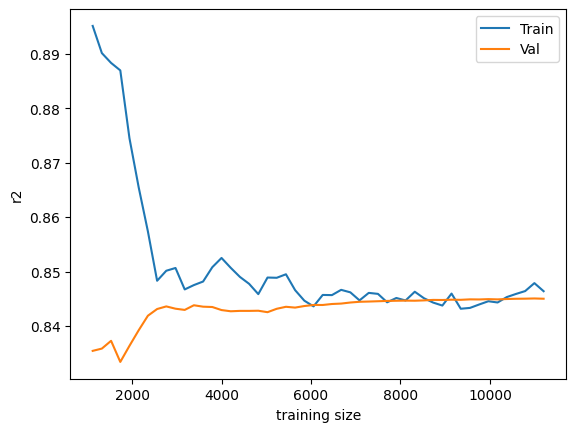

In [200]:
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Val')
plt.xlabel('training size')
plt.ylabel('r2')
plt.legend()

In [201]:
from sklearn.model_selection import learning_curve

model = pipe_Polyreg
train_sizes, train_scores, val_scores, fit_times, _ = learning_curve(model, X_train, y_train,
                                                      train_sizes=np.linspace(0.1, 1, 50), cv=5,
                                                      scoring='r2', return_times=True)

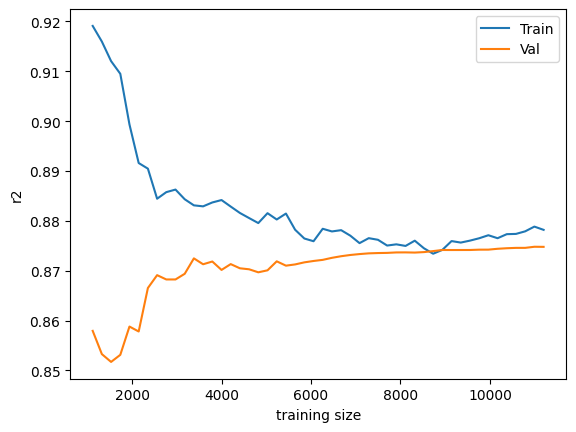

In [202]:
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Val')
plt.xlabel('training size')
plt.ylabel('r2')
plt.legend()